In [1]:
from pathlib import Path
import sys

# More reliable: get the project root from the notebook's location
ROOT_PATH = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
# Or even better for notebooks:
ROOT_PATH = Path().resolve().parent  # Goes up from notebooks/ folder

sys.path.append(str(ROOT_PATH))

from src.data.dataset import OrionAEFrameDataset
from src.data.transforms import preprocess
from src.data.transforms import features
from src.data.transforms import (
    BaseTransform,
    FilterPipeline,
    NormPipeline,
    PreprocessPipeline,
    FeaturePipeline,
)

In [2]:
preprocess_pipeline = PreprocessPipeline(
    # filters=[HighPassFilter(cutoff=100, fs=5e6, order=5)],
    # norms=[
    #     ZScoreNorm(
    #         mean=[0.51982021, 1.78221031, 0.32854723], 
    #         std=[4.81500911, 6.92255416, 8.82353942]
    #     )
    # ]
    miscs=[preprocess.HanningWindow()]
)

feature_pipeline = FeaturePipeline(
    features=[
        features.CWTScalogramTransform(
            n_scales=10,
            wavelet="cmor",
            min_scale=1,
            max_scale=100,
            sampling_rate=5e6
        )
    ]
)
train_set = OrionAEFrameDataset(
    data_path=r"F:\orion-ae-study\data\raw\segmented_cycles_positive_c1_l42373_c_A_B_C_D_20251220_154951",
    config_path=r"F:\orion-ae-study\configs\dataset\example_1.yaml",
    type="train",
    preprocess_pipeline=preprocess_pipeline,
    feature_pipeline=feature_pipeline
)

In [21]:
scalo = train_set[100]['features']['CWTScalogramTransform']

f:\orion-ae-study\venv\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [22]:
scalo[0].shape

(224, 224, 3)

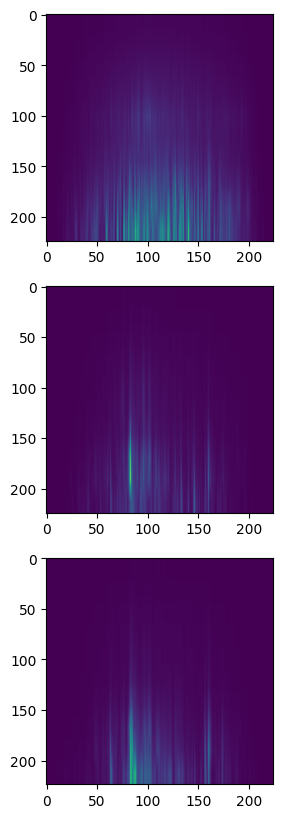

In [23]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.imshow(scalo[0])
plt.subplot(3, 1, 2)
plt.imshow(scalo[1])
plt.subplot(3, 1, 3)
plt.imshow(scalo[2])
